In [1]:
# libraries
import pandas as pd
import numpy as np
from pathlib import Path

# charts
import matplotlib.pyplot as plt
import seaborn as sns

# data scaling
from sklearn.preprocessing  import StandardScaler

# PCA
from sklearn.decomposition import PCA 

# Clustering

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN # los clusters a usar
from sklearn.metrics import silhouette_score # coef de silueta
from scipy.cluster.hierarchy import dendrogram, linkage # Dendograma y linkage

# Comments

 * Numbers of clusters: 4-8

 * Investment: 400k USDT

 * Expected return: 30% in next two years (120.k USD per year)

 * Campaing zone: Arizona, California, Idaho, Nevada, Oregon, Utah, Washington

 * Make any asumption that could be considered necessary

 * Explicity where i used help

 * Data already proccesed

 * There are 3 tables


# test
In this test, I will proceed with three major steps: descriptive statistical analysis, data wrangling (where necessary), and data modeling.

`Preguntas para el Smith del futuro`

COMO SE CONVERSAN ESA 3 TABLAS? QUIEN Y COMO SERÁ MI MASTER TABLE?

DESDE EL DESCRIPTIVO, PUEDO EMPEZAR A CONSTRUIR LA ESTRATEGIA DE SELECCION DEL GRUPO?

DESDE EL DESCRIPTIVO, PUEDO DESCARTAR OTRAS COLUMNAS A ANALIZAR?

LA HORA DEL VUELO ES IMPORTANTE? (NO APARECE EN HEAD DEL DATA FRAME)

# Question 1: Group's loyal strategy

 * The selected states to analysis are the ones in which the campaign will be conductes. This states are the ones with ORIGIN_STATE and DESTINATION_STATE field is one of the previously selected (Arizona, California, Idaho, Nevada, Oregon, Utah, Washington)

 * Is thre any carrier who has a major amount of fligths withis these states? 

In [2]:
PATH_TO_DATA = r''
flights = pd.read_csv(Path(PATH_TO_DATA, 'cluster_case_data.csv.gz'))
airports_mapping = pd.read_csv(Path(PATH_TO_DATA, 'L_AIRPORT_ID.csv'))
carriers_mapping = pd.read_csv(Path(PATH_TO_DATA, 'L_CARRIER_HISTORY.csv'))

In [3]:
# Categorical and numerical
def categorical_numerical(df):
    """
    Python function to select categorical and numerical columns of a pandas DataFrame.
    The idea is to optimize time within the test to have an easy way to have a descriptive analysis.
    
    Args:
        df (DataFrame): Pandas DataFrame to calculate numerical and categorical columns.
        
    Returns:
        tuple: A tuple containing two lists: categorical features and numerical features.
    """
    categorical = []
    numerical = []
    for i in df.columns:
        if df[i].nunique() <= 15:
            categorical.append(i)
        else:
            numerical.append(i)
    return categorical, numerical

# Basics views 
def df_basics(data):
    print("First few rows of the dataset:")
    print(data.head())
    print("\nShape of the dataset:")
    print(data.shape)
    print("\nInformation about the dataset:")
    print(data.info())
    print("\nNumber of missing values in each column:")
    print(data.isnull().sum())
    print("\nDescriptive statistics of numerical variables:")
    print(data.describe())
    print("\nDescriptive statistics of all variables:")
    print(data.describe(include='all'))


In [4]:
f_cat, f_num = categorical_numerical(flights)
a_cat, a_num = categorical_numerical(airports_mapping) 
c_cat, c_num = categorical_numerical(carriers_mapping)

print("Flights - Categorical:", f_cat)
print("Flights - Numerical:", f_num)

print("Airports Mapping - Categorical:", a_cat)
print("Airports Mapping - Numerical:", a_num)

print("Carriers Mapping - Categorical:", c_cat)
print("Carriers Mapping - Numerical:", c_num)



Flights - Categorical: ['UNIQUE_CARRIER', 'AIRLINE_ID', 'ORIGIN_STATE_NM', 'CANCELLED']
Flights - Numerical: ['DATE_EXP_ARRIVAL', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID', 'DEST_CITY_NAME', 'DEST_STATE_NM', 'AIR_TIME', 'DISTANCE', 'TOTAL_EXPECTED_FLIGHTS', 'TOTAL_DELAYED_FLIGHTS']
Airports Mapping - Categorical: []
Airports Mapping - Numerical: ['Code', 'Description']
Carriers Mapping - Categorical: []
Carriers Mapping - Numerical: ['Code', 'Description']


In [5]:

a_cat, a_num = categorical_numerical(airports_mapping) 
c_cat, c_num = categorical_numerical(carriers_mapping)

print("Flights - Categorical:", f_cat)
print("Flights - Numerical:", f_num)

print("Airports Mapping - Categorical:", a_cat)
print("Airports Mapping - Numerical:", a_num)

print("Carriers Mapping - Categorical:", c_cat)
print("Carriers Mapping - Numerical:", c_num)

# Basics views 
def df_basics(data):
    print("First few rows of the dataset:")
    print(data.head())
    print("\nShape of the dataset:")
    print(data.shape)
    print("\nInformation about the dataset:")
    print(data.info())
    print("\nNumber of missing values in each column:")
    print(data.isnull().sum())
    print("\nDescriptive statistics of numerical variables:")
    print(data.describe())
    print("\nDescriptive statistics of all variables:")
    print(data.describe(include='all'))

Flights - Categorical: ['UNIQUE_CARRIER', 'AIRLINE_ID', 'ORIGIN_STATE_NM', 'CANCELLED']
Flights - Numerical: ['DATE_EXP_ARRIVAL', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID', 'DEST_CITY_NAME', 'DEST_STATE_NM', 'AIR_TIME', 'DISTANCE', 'TOTAL_EXPECTED_FLIGHTS', 'TOTAL_DELAYED_FLIGHTS']
Airports Mapping - Categorical: []
Airports Mapping - Numerical: ['Code', 'Description']
Carriers Mapping - Categorical: []
Carriers Mapping - Numerical: ['Code', 'Description']


# Fligths analysis

In [6]:
# filtering data: Tengo que ver como estan los datos inputados, supongaos por ahora que son los estados en mayuscula
states =  ["Arizona", "California", "Idaho", "Nevada", "Oregon", "Utah", "Washington"]
print(flights["ORIGIN_STATE_NM"].unique())
print(flights["DEST_STATE_NM"].unique())


['Texas' 'Ohio' 'Colorado' 'Virginia' 'Michigan' 'Florida' 'Kansas'
 'New York' 'Arkansas' 'Louisiana' 'Oklahoma' 'Illinois' 'West Virginia'
 'South Dakota' 'Mississippi']
['Texas' 'New York' 'California' 'Illinois' 'Florida' 'New Mexico'
 'Georgia' 'Connecticut' 'Alabama' 'Tennessee' 'Massachusetts' 'Maryland'
 'Ohio' 'North Carolina' 'Colorado' 'Virginia' 'Iowa' 'Michigan'
 'New Jersey' 'Hawaii' 'Kansas' 'Indiana' 'Wyoming' 'Nevada' 'Arkansas'
 'Missouri' 'Wisconsin' 'Minnesota' 'Louisiana' 'Oklahoma' 'Nebraska'
 'Oregon' 'Pennsylvania' 'Arizona' 'Kentucky' 'Washington' 'Puerto Rico'
 'Utah' 'U.S. Virgin Islands' 'Alaska' 'Rhode Island' 'Vermont'
 'South Carolina' 'Maine' 'West Virginia' 'New Hampshire' 'Montana'
 'North Dakota' 'South Dakota' 'Mississippi' 'Delaware' 'Idaho']


In [7]:
flights.DISTANCE.describe()

count    1.342107e+06
mean     7.908851e+02
std      5.267543e+02
min      2.400000e+01
25%      4.040000e+02
50%      6.910000e+02
75%      1.036000e+03
max      4.983000e+03
Name: DISTANCE, dtype: float64

In [8]:
# fligths filtrado por estos estados
flights = flights[( flights["ORIGIN_STATE_NM"].isin(states) | flights["DEST_STATE_NM"].isin(states))]


In [9]:
df_basics(flights)

First few rows of the dataset:
        DATE_EXP_ARRIVAL UNIQUE_CARRIER  AIRLINE_ID  ORIGIN_AIRPORT_ID  \
123  2014-01-01 00:00:00             AA       19805              10423   
124  2014-01-01 12:00:00             AA       19805              10423   
125  2014-01-02 00:00:00             AA       19805              10423   
126  2014-01-02 12:00:00             AA       19805              10423   
127  2014-01-03 00:00:00             AA       19805              10423   

    ORIGIN_CITY_NAME ORIGIN_STATE_NM  DEST_AIRPORT_ID   DEST_CITY_NAME  \
123       Austin, TX           Texas            12892  Los Angeles, CA   
124       Austin, TX           Texas            12892  Los Angeles, CA   
125       Austin, TX           Texas            12892  Los Angeles, CA   
126       Austin, TX           Texas            12892  Los Angeles, CA   
127       Austin, TX           Texas            12892  Los Angeles, CA   

    DEST_STATE_NM  CANCELLED  AIR_TIME  DISTANCE  TOTAL_EXPECTED_FLIGHTS  \
123

In [10]:
for i in f_num:
    print(flights[i].describe())

count                  256363
unique                    730
top       2014-12-23 12:00:00
freq                      378
Name: DATE_EXP_ARRIVAL, dtype: object
count    256363.000000
mean      12193.811665
std        1182.033339
min       10257.000000
25%       11292.000000
50%       11921.000000
75%       13204.000000
max       15919.000000
Name: ORIGIN_AIRPORT_ID, dtype: float64
count         256363
unique            41
top       Denver, CO
freq           54569
Name: ORIGIN_CITY_NAME, dtype: object
count    256363.000000
mean      13917.253250
std        1043.117915
min       10561.000000
25%       12892.000000
50%       14107.000000
75%       14771.000000
max       15376.000000
Name: DEST_AIRPORT_ID, dtype: float64
count              256363
unique                 33
top       Los Angeles, CA
freq                39158
Name: DEST_CITY_NAME, dtype: object
count         256363
unique             7
top       California
freq          120528
Name: DEST_STATE_NM, dtype: object
count    190530

In [11]:
f_cat

['UNIQUE_CARRIER', 'AIRLINE_ID', 'ORIGIN_STATE_NM', 'CANCELLED']

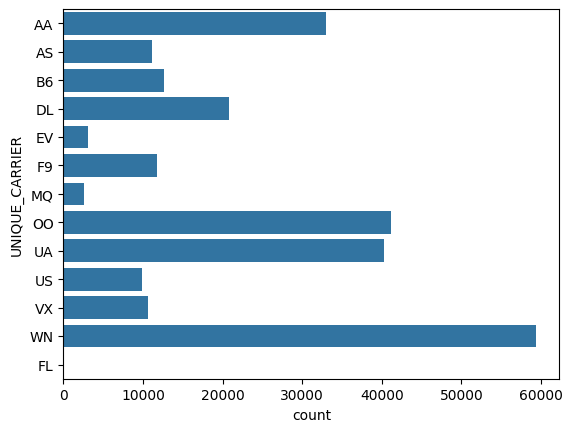

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000249C3D339C0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000024980016160> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [13]:

for i in f_cat.pop("AIRLINE_ID"):
    sns.countplot(flights[i])
    plt.show()

`insights`
 * WN carrier: Carrier with most impact followed by OO, UA, AA

 *

In [ ]:
f_num

['DATE_EXP_ARRIVAL',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_CITY_NAME',
 'DEST_AIRPORT_ID',
 'DEST_CITY_NAME',
 'DEST_STATE_NM',
 'AIR_TIME',
 'DISTANCE',
 'TOTAL_EXPECTED_FLIGHTS',
 'TOTAL_DELAYED_FLIGHTS']

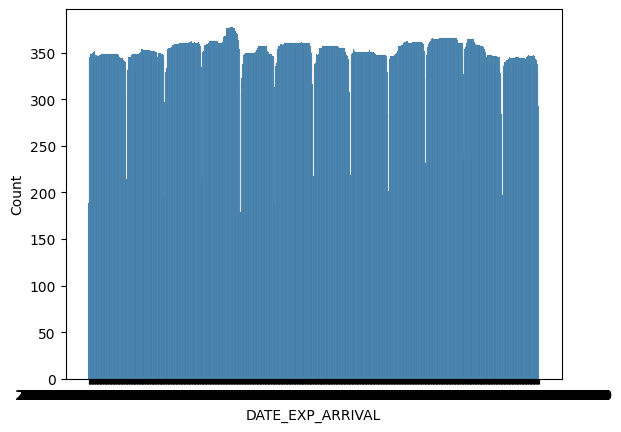

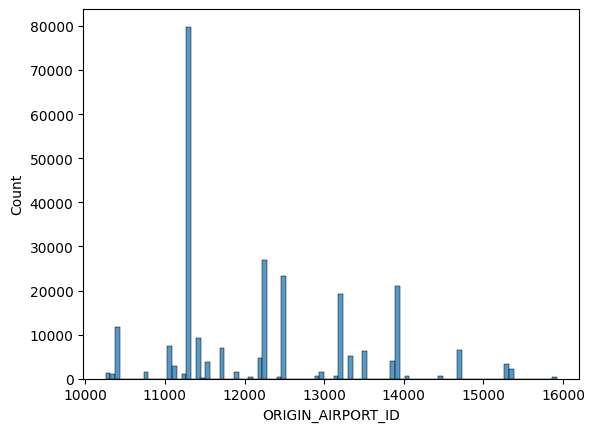

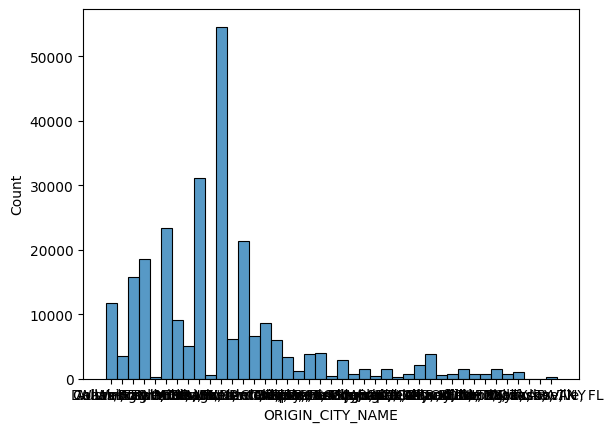

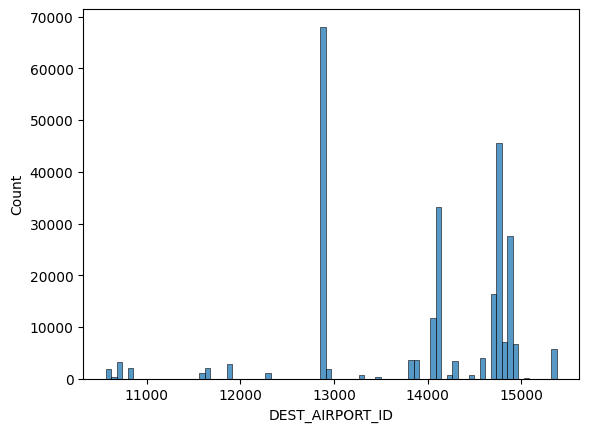

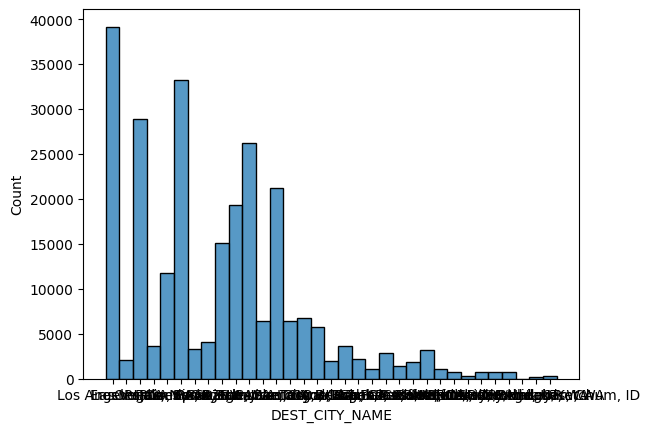

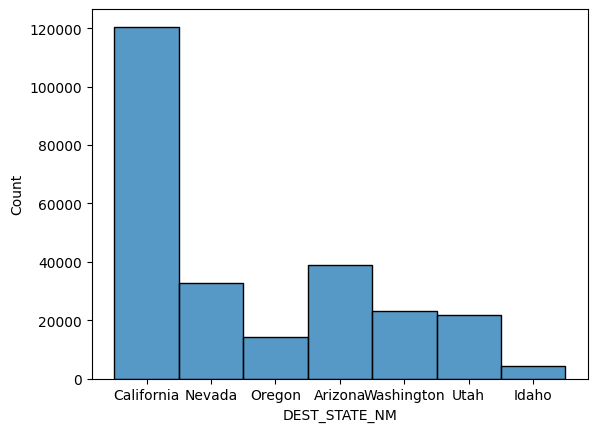

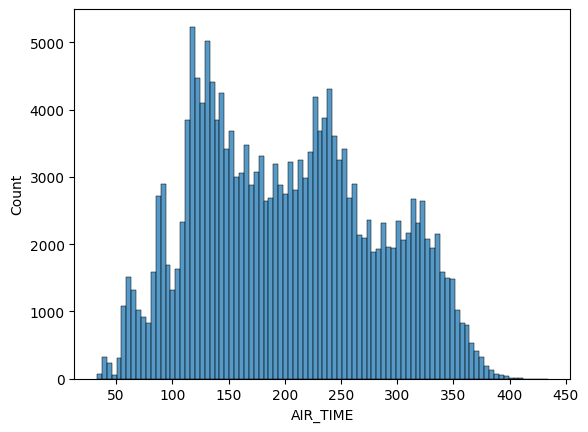

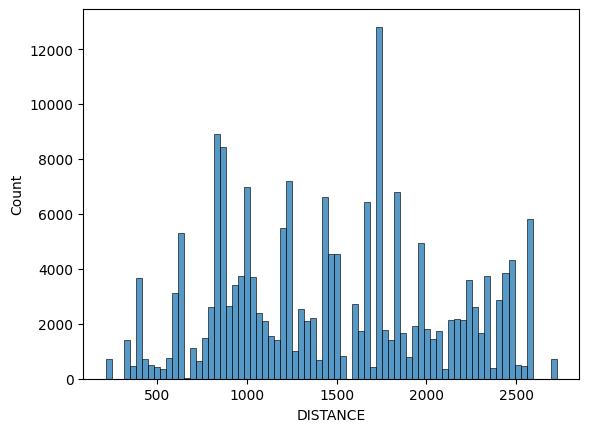

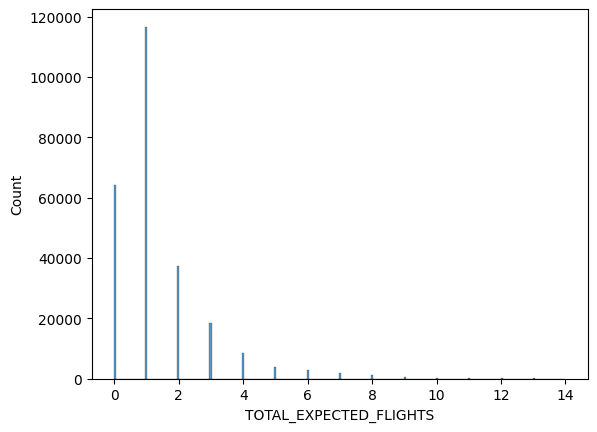

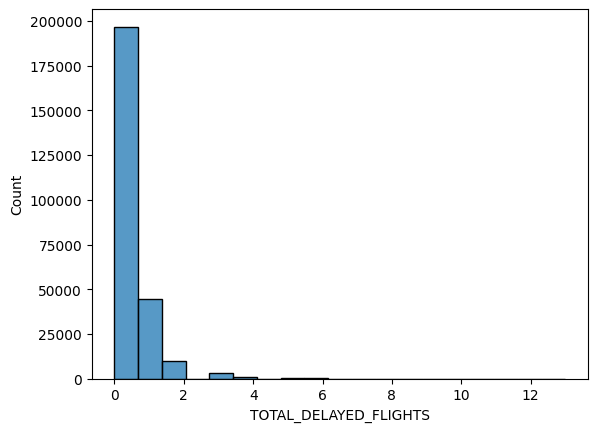

In [ ]:
for i in f_num:
    sns.histplot(flights[i])
    plt.show()

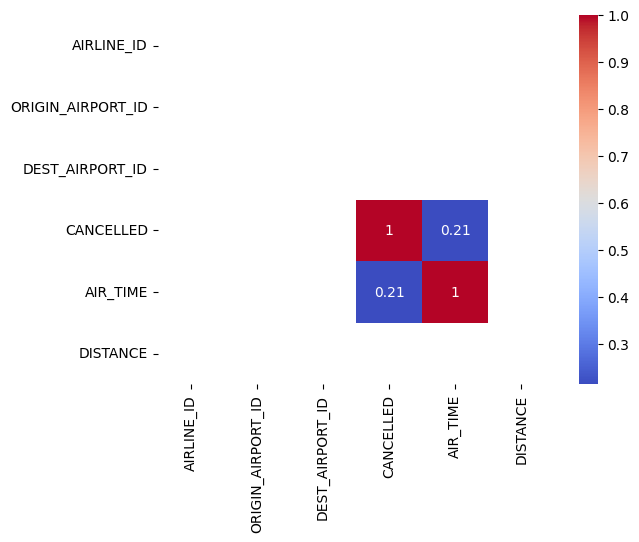

In [14]:
numeric_corr = flights.corr(numeric_only=True)
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.show()

# Carrier analysis


In [12]:
carriers_mapping.head()

,Code,Description
0,02Q,Titan Airways (2006 - )
1,04Q,Tradewind Aviation (2006 - )
2,05Q,"Comlux Aviation, AG (2006 - 2012)"
3,06Q,Master Top Linhas Aereas Ltd. (2007 - )
4,07Q,Flair Airlines Ltd. (2007 - )


# Airports analysis

In [13]:
airports_mapping.head()

,Code,Description
0,10001,"Afognak Lake, AK: Afognak Lake Airport"
1,10003,"Granite Mountain, AK: Bear Creek Mining Strip"
2,10004,"Lik, AK: Lik Mining Camp"
3,10005,"Little Squaw, AK: Little Squaw Airport"
4,10006,"Kizhuyak, AK: Kizhuyak Bay"


In [14]:
flights.head()

,DATE_EXP_ARRIVAL,UNIQUE_CARRIER,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_CITY_NAME,DEST_STATE_NM,CANCELLED,AIR_TIME,DISTANCE,TOTAL_EXPECTED_FLIGHTS,TOTAL_DELAYED_FLIGHTS
123,2014-01-01 00:00:00,AA,19805,10423,"Austin, TX",Texas,12892,"Los Angeles, CA",California,0.0,167.0,1242.0,1.0,0.0
124,2014-01-01 12:00:00,AA,19805,10423,"Austin, TX",Texas,12892,"Los Angeles, CA",California,0.0,167.5,1242.0,2.0,1.0
125,2014-01-02 00:00:00,AA,19805,10423,"Austin, TX",Texas,12892,"Los Angeles, CA",California,0.0,166.0,1242.0,1.0,1.0
126,2014-01-02 12:00:00,AA,19805,10423,"Austin, TX",Texas,12892,"Los Angeles, CA",California,0.0,162.5,1242.0,2.0,1.0
127,2014-01-03 00:00:00,AA,19805,10423,"Austin, TX",Texas,12892,"Los Angeles, CA",California,0.0,181.0,1242.0,1.0,0.0


In [15]:
# seleccting features 

flights.columns

Index(['DATE_EXP_ARRIVAL', 'UNIQUE_CARRIER', 'AIRLINE_ID', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST_AIRPORT_ID',
       'DEST_CITY_NAME', 'DEST_STATE_NM', 'CANCELLED', 'AIR_TIME', 'DISTANCE',
       'TOTAL_EXPECTED_FLIGHTS', 'TOTAL_DELAYED_FLIGHTS'],
      dtype='object')

State was used to filter dataframe withis the campaigns scope. Now, this feature is not requiered duu the strategy used is to analyze whhich fligths are more similar. 

The idea: to idenify similar fliths based on distance and city. This woudl privide the insight of what kind of fliosght are the most common(alike) and with this, create and strategy to offer discounts to the most common flith where there are a relation between the total numbers of flith is max and the distance is min. (Could be a cluster)

In [25]:
features = [  'CANCELLED', 'AIR_TIME', 'DISTANCE',
       'TOTAL_EXPECTED_FLIGHTS', 'TOTAL_DELAYED_FLIGHTS']

# Master table

table with all the modelling data. In this table there will be a subset of features that i selected to the analysis of fligths, carriers and airport tables. Let's see what can i find

In [26]:
mt =flights.loc[:, features]# i guess this would be a merge
mt.head()

,CANCELLED,AIR_TIME,DISTANCE,TOTAL_EXPECTED_FLIGHTS,TOTAL_DELAYED_FLIGHTS
123,0.0,167.0,1242.0,1.0,0.0
124,0.0,167.5,1242.0,2.0,1.0
125,0.0,166.0,1242.0,1.0,1.0
126,0.0,162.5,1242.0,2.0,1.0
127,0.0,181.0,1242.0,1.0,0.0


# Data scaling 

we sahould do sat scaling to optimize algorithms performance. Out time, not done

In [29]:
scaler = StandardScaler()
mt_scaled = scaler.fit_transform(mt) #remeber, this would be anumpy array
mt_scaled

array([[-0.10142579, -0.45927365, -0.38640179, -0.24938756, -0.44837299],
       [-0.10142579, -0.45296269, -0.38640179,  0.39750558,  0.92449651],
       [-0.10142579, -0.47189555, -0.38640179, -0.24938756,  0.92449651],
       ...,
       [-0.10142579, -0.73695553, -0.89216332, -0.24938756, -0.44837299],
       [-0.10142579, -0.72433363, -0.89216332, -0.24938756, -0.44837299],
       [-0.10142579, -0.85055267, -0.89216332, -0.24938756, -0.44837299]])

In [30]:
# datos escalados
mt_scaled = pd.DataFrame(mt_scaled, columns= mt.columns)

In [31]:
mt_scaled.head()

,CANCELLED,AIR_TIME,DISTANCE,TOTAL_EXPECTED_FLIGHTS,TOTAL_DELAYED_FLIGHTS
0,-0.101426,-0.459274,-0.386402,-0.249388,-0.448373
1,-0.101426,-0.452963,-0.386402,0.397506,0.924497
2,-0.101426,-0.471896,-0.386402,-0.249388,0.924497
3,-0.101426,-0.516072,-0.386402,0.397506,0.924497
4,-0.101426,-0.282567,-0.386402,-0.249388,-0.448373


# PCA

In [32]:
pca = PCA() # cree el objeto denominado PCA
pca.fit(mt_scaled) # ajuste a pcalos datos

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
pca_data_scaled = pca.transform(mt_scaled)
pca_data_scaled

In [33]:
var = pca.explained_variance_ratio_
var # porcentaje de varianza explicada por el modelo

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

In [ ]:
cum_var = np.cumsum(np.round(var, decimals=4)*100) 
plt.figure(figsize=(5,5))
plt.plot(cum_var, 'r-x')
plt.show()

In [ ]:
# seleccion de columnas
# seleccion de las columnas con los componentes principales
pca_data_standard = pd.DataFrame(pca_data_scaled) # PCA dataframe 
pca_data_standard.drop(["Columnas_a eliminar"],axis=1, inplace=True) # le quitamos las columnas 4,5,6,7,,8 metiendo esos numeros en la lista

In [ ]:
pca_data_standard

# Tran-Test

# Models

K-means, K-modes, Hierchical, DBSCAN, SVM

y pues yo creo que ya
